In [ ]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [39]:


df = pd.read_csv('../data/adult.csv')

df = df.replace('?', pd.NA) # замена '?' на стандартное значение NA pandas
df = df.dropna() # удаление строк с любым значением NA

df['salary'] = df['salary'].map({'>50K': 51, '<=50K': 50})

df['check'] = df['salary K$'].apply(lambda x: x > 50) == (df['salary'] > 50)

if not df['check'].all():
    raise ValueError('Data in columns "salary" and "salary K$" do not match.')
df.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$,check
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,50,39,True
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,50,35,True
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,50,27,True
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,50,43,True
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,50,25,True


# Task 1
Print the count of men and women in the dataset.

In [20]:
sex_counts = df['sex'].value_counts()
print(sex_counts)

Male      20380
Female     9782
Name: sex, dtype: int64


# Task 2
Find the average age of men in dataset

In [21]:
average_age_men = df[df['sex'] == 'Male']['age'].mean()
print(average_age_men)

39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [27]:
total_people = df.shape[0]  # Общее количество людей
people_from_poland = df[df['native-country'] == 'Poland'].shape[0]  # Количество людей из Польши

percentage = (people_from_poland / total_people) * 100  # Расчет процента
print(f"{round(percentage, 2)}%")

0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [38]:
# Для людей, которые зарабатывают > 50K в год
high_income = df[df['salary K$'] > 50]
mean_age_high_income = high_income['age'].mean()
std_age_high_income = high_income['age'].std()

print("Mean age of people with high income: ", round(mean_age_high_income, 2))
print("Standard deviation of age for people with high income: ", round(std_age_high_income, 2))

# Для людей, которые зарабатывают <= 50K в год
low_income = df[df['salary K$'] <= 50]
mean_age_low_income = low_income['age'].mean()
std_age_low_income = low_income['age'].std()

print("Mean age of people with low income: ", round(mean_age_low_income, 2))
print("Standard deviation of age for people with low income: ", round(std_age_low_income, 2))


Mean age of people with high income:  43.96
Standard deviation of age for people with high income:  10.27
Mean age of people with low income:  36.61
Standard deviation of age for people with low income:  13.46


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [44]:
# Сначала определим, какие уровни образования мы считаем высшим
higher_edu = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

# Затем сформируем подмножество данных людей, зарабатывающих более 50K в год
high_income = df[df['salary K$'] > 50]

# Теперь найдем людей без высшего образования, зарабатывающих более 50K в год
no_higher_edu_high_income = high_income[~high_income['education'].isin(higher_edu)]

# Если такие люди существуют, то длина нашего подмножества данных будет больше нуля
if len(no_higher_edu_high_income) > 0:
    print("Yes")
else:
    print("Not")

Yes


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [47]:
age_stats = df.groupby('education')['age'].describe()
print(age_stats)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [8]:
import pandas as pd
df = pd.read_csv('../data/adult.csv')

# Для женатых мужчин
married_men = df[(df['sex'] == 'Male') & (df['marital-status'].str.startswith('Married'))]
mean_salary_married_men = married_men['salary K$'].mean()

print("Mean salary of married men: ", round(mean_salary_married_men, 2))

# Для неженатых мужчин
not_married_men = df[(df['sex'] == 'Male') & (~df['marital-status'].str.startswith('Married'))]
mean_salary_not_married_men = not_married_men['salary K$'].mean()

print("Mean salary of not married men: ", round(mean_salary_not_married_men, 2))

# Сравнение
if mean_salary_married_men > mean_salary_not_married_men:
    print("Married men earn more on average.")
elif mean_salary_married_men < mean_salary_not_married_men:
    print("Not married men earn more on average.")
else:
    print("Married and not married men earn the same on average.")


Mean salary of married men:  106.36
Mean salary of not married men:  45.98
Married men earn more on average.


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [48]:
max_hours = df['hours-per-week'].max()
num_people = df['hours-per-week'].value_counts()[max_hours]

print("Max hours per week:", max_hours)
print("Number of people working the same amount of hours per week:", num_people)

Max hours per week: 99
Number of people working the same amount of hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

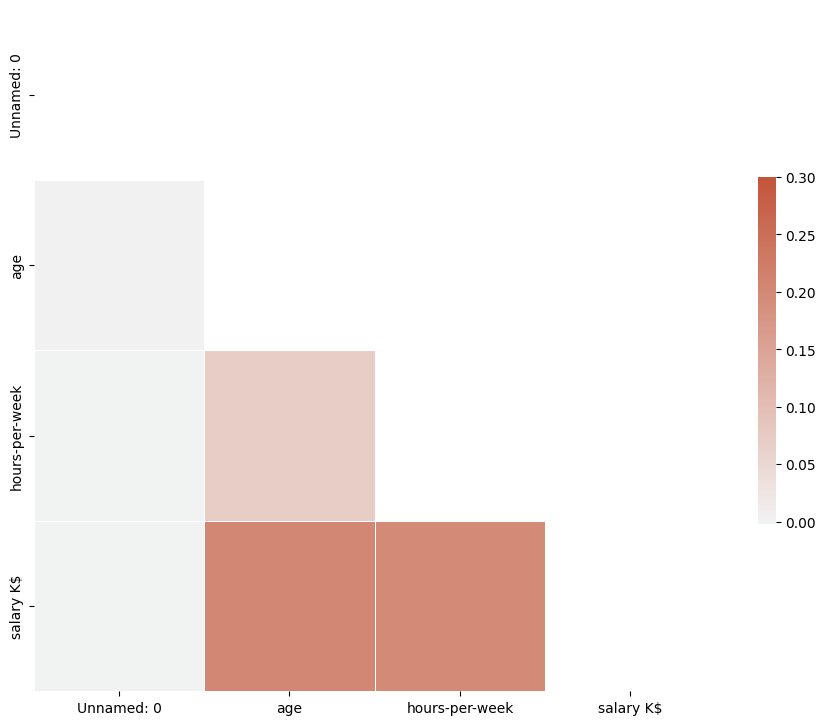

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()